In [13]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
from __future__ import division


import matplotlib.gridspec as gridspec 
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regexfrom sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

chat_df = pd.read_json('../data/oppia_chat.json')
chat_df.head()

,editedAt,fromUser,html,id,issues,mentions,meta,readBy,sent,status,text,unread,urls,v
0,NaN,"{'id': '57d3062040f3a6eec0647028', 'username':...",Congratulations community. oppia is accepted i...,5a81f100ce68c3bc7479a82e,[],[],[],40,2018-02-12T19:54:40.690Z,NaN,Congratulations community. oppia is accepted i...,False,[],1
1,NaN,"{'id': '588d8007d73408ce4f46b5eb', 'username':...","Congrats <span data-link-type=""mention"" data-s...",5a81f123b3c4a0d376141863,[],"[{'screenName': 'all', 'userIds': []}]",[],40,2018-02-12T19:55:15.764Z,NaN,Congrats @all,False,[],1
2,NaN,"{'id': '59c3730ed73408ce4f76b6f7', 'username':...",Hey where are the gsoc ideas for oppia?,5a820f667084124a346bdfeb,[],[],[],37,2018-02-12T22:04:22.773Z,NaN,Hey where are the gsoc ideas for oppia?,False,[],1
3,NaN,"{'id': '588d8007d73408ce4f46b5eb', 'username':...","<span data-link-type=""mention"" data-screen-nam...",5a820fa693be87284dabafb8,[],"[{'screenName': 'darthgera123', 'userId': '59c...",[],37,2018-02-12T22:05:26.766Z,NaN,@darthgera123 Follow the [link](https://github...,False,[{'url': 'https://github.com/oppia/oppia/wiki/...,1
4,NaN,"{'id': '59c3730ed73408ce4f76b6f7', 'username':...","<span data-link-type=""mention"" data-screen-nam...",5a820ff0e217167e2c76e227,[],"[{'screenName': 'WickedBrat', 'userId': '588d8...",[],37,2018-02-12T22:06:40.859Z,NaN,@WickedBrat what projects are you looking at ?,False,[],1


In [14]:
def Extract_Username(column):
    temp_dict = dict(column)
    return temp_dict['username']

def Extract_Issue_Number(column):
    if column != []:
        temp_dict = dict(column[0])
        return temp_dict['number']
    else:
        return np.nan 
def Extract_URLs(column):
    if column != []:
        temp_dict = dict(column[0])
        return temp_dict[u'url']
    else:
        return np.nan
def Mentions(column):
    mention_lst = ', '.join(re.findall("@([a-z0-9_]+)", column, re.I))
    return mention_lst

chat_df['username'] = chat_df['fromUser'].apply(Extract_Username)
chat_df['issue number'] = chat_df['issues'].apply(Extract_Issue_Number)
chat_df['url'] = chat_df['urls'].apply(Extract_URLs)
chat_df['mentions'] = chat_df['text'].apply(Mentions)
chat_df['mentions'].replace(to_replace ='', value= np.nan, inplace = True )

cols_to_drop = ["fromUser","html","issues","meta","status","unread","urls"]
chat_df.drop(cols_to_drop, axis=1, inplace=True)

chat_df['sent'] = pd.to_datetime(chat_df['sent'])
chat_df['editedAt'] = pd.to_datetime(chat_df['editedAt'])


In [15]:
chat_df =chat_df[[ u'id',u'username',u'text',u'issue number',u'mentions',u'sent',u'editedAt',u'readBy',u'v',u'url']]

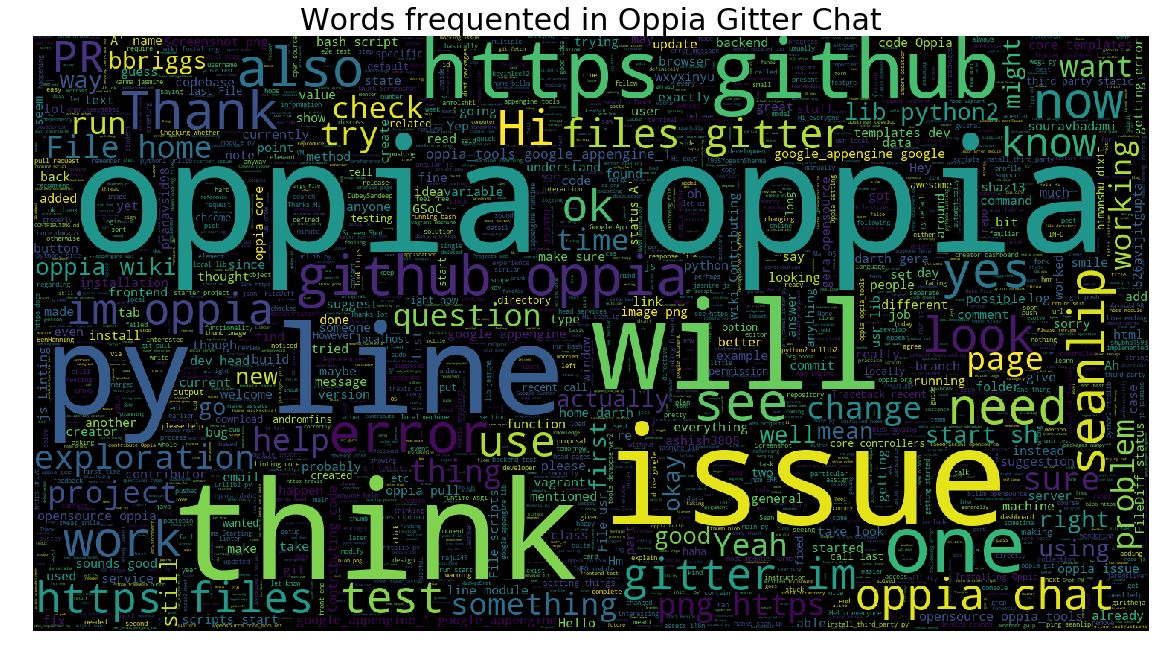

In [16]:
stopword=set(STOPWORDS)
text=chat_df.text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words frequented in Oppia Gitter Chat", fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

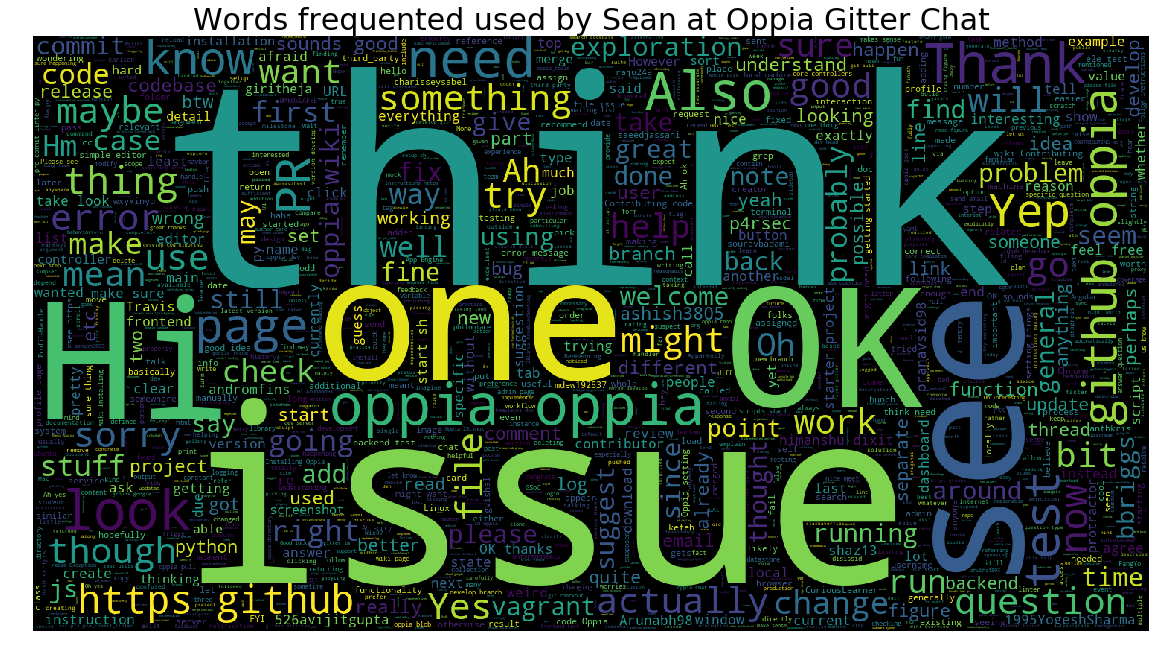

In [17]:
text=chat_df[chat_df['username'] == 'seanlip'].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words frequented used by Sean at Oppia Gitter Chat", fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

In [18]:
chat_df['question_marks'] = chat_df['text'].apply(lambda comment: comment.count('?'))

In [19]:
print "Number of Questions asked:" , chat_df[ chat_df['question_marks']>0].text.shape[0]
print "Total number of comments:" , chat_df.shape[0]
print "Percentage of Questions:", (chat_df[ chat_df['question_marks']>0].text.shape[0] / chat_df.shape[0])*100

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Number of Questions asked:" , chat_df[ chat_df['question_marks']>0].text.shape[0])? (<ipython-input-19-35ca077b2409>, line 1)

In [20]:
chat_df['Year'] = chat_df['sent'].dt.year
chat_df['Month'] = chat_df['sent'].dt.month
chat_df['Quarter'] = chat_df['sent'].dt.quarter
chat_df['DOW'] = chat_df['sent'].dt.dayofweek
chat_df['Day'] = chat_df['sent'].dt.day
chat_df['Hour'] = chat_df['sent'].dt.hour

In [21]:
chat_df.head()

,id,username,text,issue number,mentions,sent,editedAt,readBy,v,url,question_marks,Year,Month,Quarter,DOW,Day,Hour
0,5a81f100ce68c3bc7479a82e,jervis446,Congratulations community. oppia is accepted i...,NaN,NaN,2018-02-12 19:54:40.690,NaT,40,1,NaN,0,2018,2,1,0,12,19
1,5a81f123b3c4a0d376141863,WickedBrat,Congrats @all,NaN,all,2018-02-12 19:55:15.764,NaT,40,1,NaN,0,2018,2,1,0,12,19
2,5a820f667084124a346bdfeb,darthgera123,Hey where are the gsoc ideas for oppia?,NaN,NaN,2018-02-12 22:04:22.773,NaT,37,1,NaN,1,2018,2,1,0,12,22
3,5a820fa693be87284dabafb8,WickedBrat,@darthgera123 Follow the [link](https://github...,NaN,darthgera123,2018-02-12 22:05:26.766,NaT,37,1,https://github.com/oppia/oppia/wiki/Google-Sum...,0,2018,2,1,0,12,22
4,5a820ff0e217167e2c76e227,darthgera123,@WickedBrat what projects are you looking at ?,NaN,WickedBrat,2018-02-12 22:06:40.859,NaT,37,1,NaN,1,2018,2,1,0,12,22


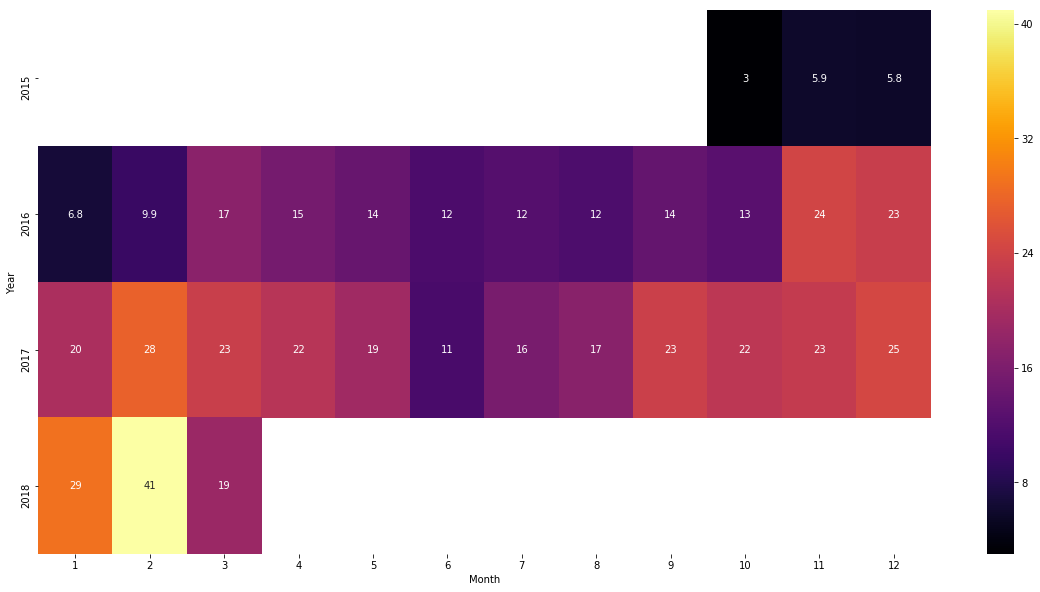

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(chat_df.pivot_table(values='readBy',
                                index='Year', columns='Month') , cmap='inferno', annot = True)

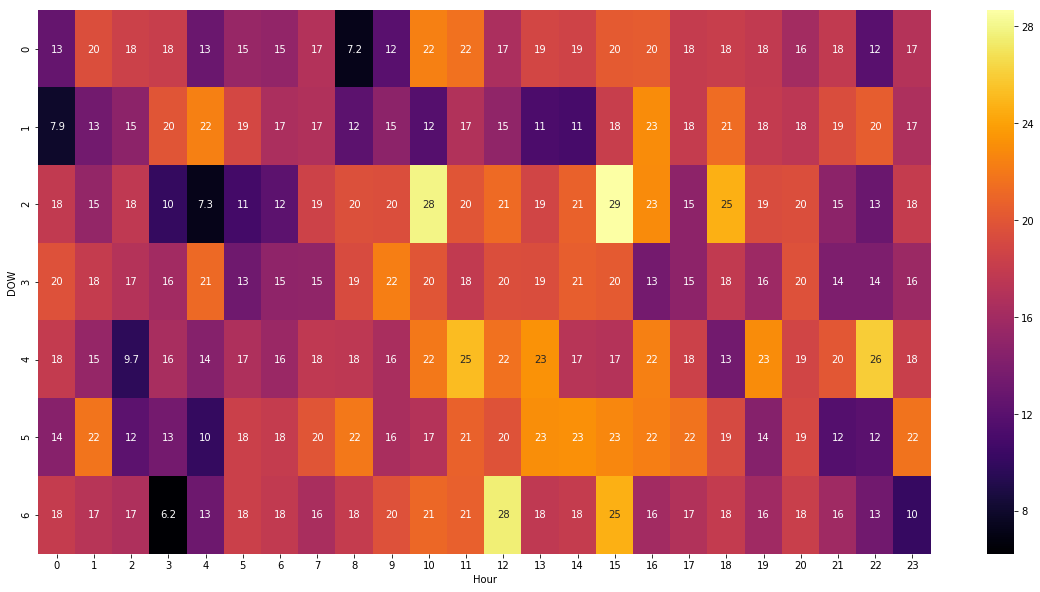

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(chat_df[chat_df['Year'] > 2015].pivot_table(values='readBy',
                                index='DOW', columns='Hour') , cmap='inferno', annot = True)

In [24]:
chat_df.head()

,id,username,text,issue number,mentions,sent,editedAt,readBy,v,url,question_marks,Year,Month,Quarter,DOW,Day,Hour
0,5a81f100ce68c3bc7479a82e,jervis446,Congratulations community. oppia is accepted i...,NaN,NaN,2018-02-12 19:54:40.690,NaT,40,1,NaN,0,2018,2,1,0,12,19
1,5a81f123b3c4a0d376141863,WickedBrat,Congrats @all,NaN,all,2018-02-12 19:55:15.764,NaT,40,1,NaN,0,2018,2,1,0,12,19
2,5a820f667084124a346bdfeb,darthgera123,Hey where are the gsoc ideas for oppia?,NaN,NaN,2018-02-12 22:04:22.773,NaT,37,1,NaN,1,2018,2,1,0,12,22
3,5a820fa693be87284dabafb8,WickedBrat,@darthgera123 Follow the [link](https://github...,NaN,darthgera123,2018-02-12 22:05:26.766,NaT,37,1,https://github.com/oppia/oppia/wiki/Google-Sum...,0,2018,2,1,0,12,22
4,5a820ff0e217167e2c76e227,darthgera123,@WickedBrat what projects are you looking at ?,NaN,WickedBrat,2018-02-12 22:06:40.859,NaT,37,1,NaN,1,2018,2,1,0,12,22


In [25]:
print plt.style.available

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(plt.style.available)? (<ipython-input-25-83a2bcaf9316>, line 1)

In [26]:
import matplotlib as mpl
# plt.style.use('seaborn-whitegrid')

Text(0,0.5,'Number of Questions')

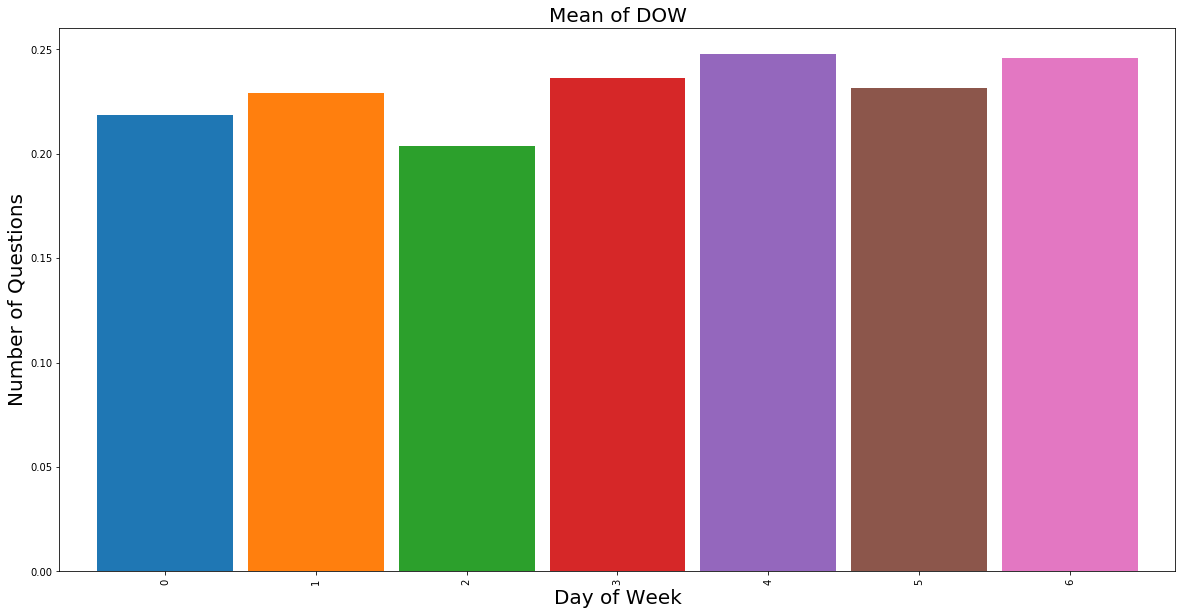

In [27]:
plt.title('Mean of DOW', fontsize=20)
chat_df.groupby(by='DOW').mean()['question_marks'].plot(figsize=(20,10), kind = 'bar',width=.9)
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Number of Questions', fontsize=20)

Text(0,0.5,'Number of Questions')

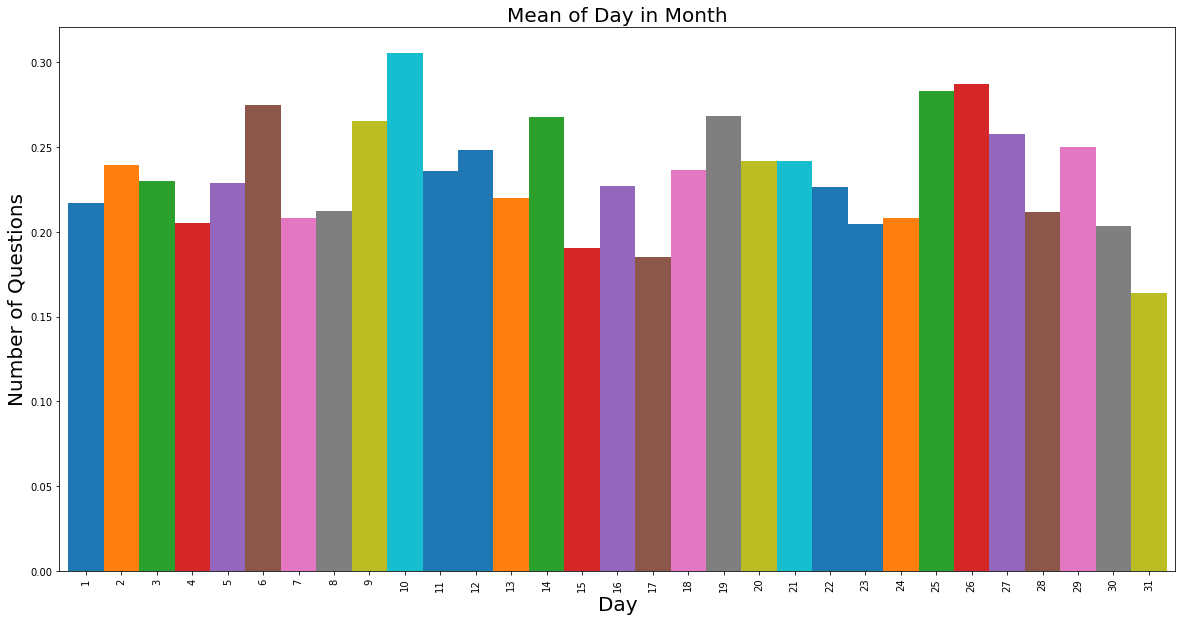

In [28]:
plt.title('Mean of Day in Month', fontsize=20)
chat_df.groupby(by='Day').mean()['question_marks'].plot(figsize=(20,10), kind='bar', width=1)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Number of Questions', fontsize=20)

Text(0,0.5,'Number of Questions')

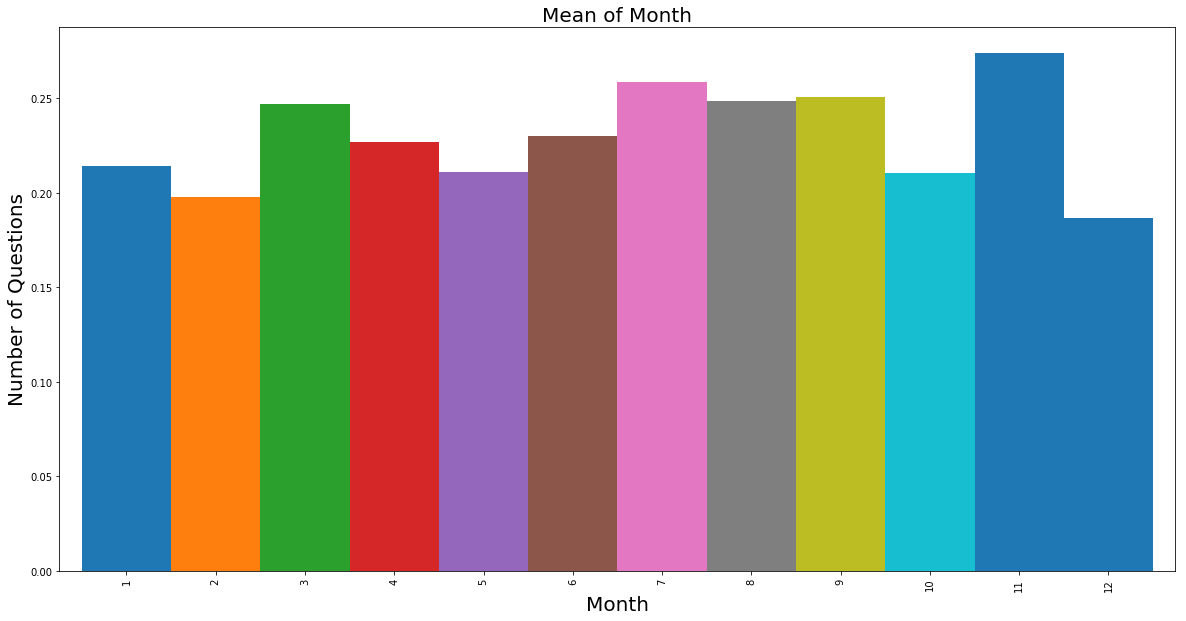

In [29]:
plt.title('Mean of Month', fontsize=20)
chat_df.groupby(by='Month').mean()['question_marks'].plot(figsize=(20,10), kind='bar', width=1)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Questions', fontsize=20)

AttributeError: Unknown property width

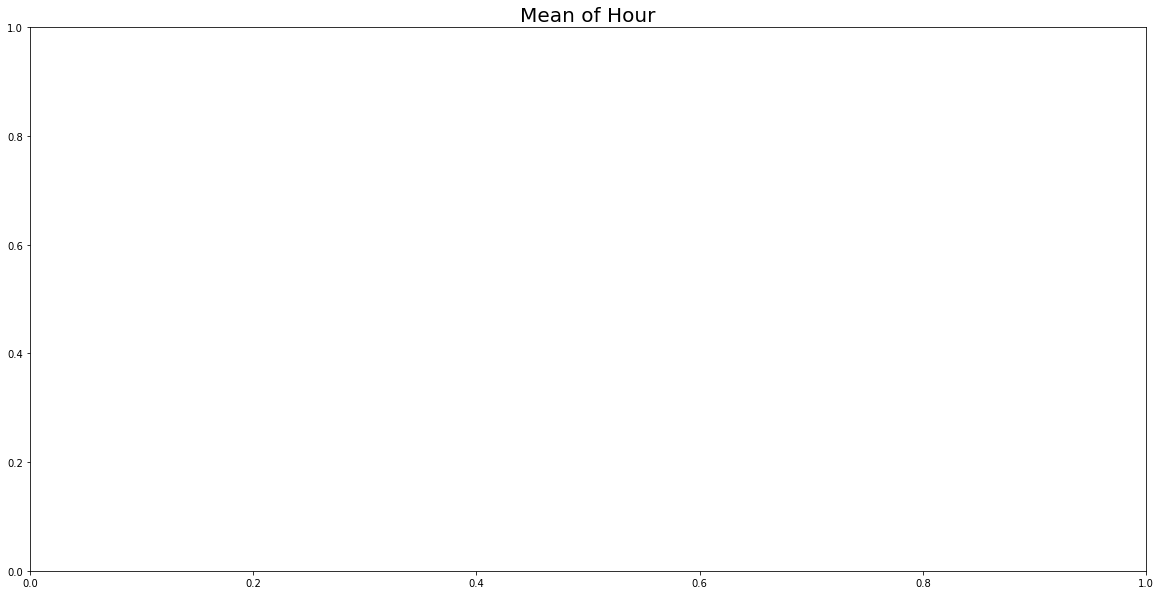

In [30]:
plt.title('Mean of Hour', fontsize=20)
chat_df.groupby(by='Hour').mean()['question_marks'].plot(figsize=(20,10), kind='line', width=1, color='gold')
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Number of Questions', fontsize=20)

In [ ]:
chat_df.to_json('../data/chat_data.json')

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [32]:
import nltk
nltk.download('stopwords')
# function to clean data
stops = set(stopwords.words("english"))
def cleanData(text, lowercase = False, remove_stops = False, stemming = False):
    txt = text
    txt = re.sub(r'[^A-Za-z0-9\s]',r'',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])

    return txt

[nltk_data] Downloading package stopwords to /Users/shaz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
chat_df['text'] = chat_df['text'].apply(cleanData, lowercase = True, remove_stops = True, stemming = True)

In [34]:
tfidfvec = TfidfVectorizer(analyzer='word', ngram_range = (1,3), min_df = 30)

In [35]:
tfidfdata = tfidfvec.fit_transform(chat_df['text'])

In [36]:
feature_names = tfidfvec.get_feature_names()
len(feature_names)

704

In [37]:
# create dataframe for features
tfidf_df = pd.DataFrame(tfidfdata.todense())

# set column names
tfidf_df.columns = feature_names

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X=tfidf_df)
cluster = pd.DataFrame(chat_df[['text','mentions','username','sent','question_marks']])
cluster['cluster'] = kmeans.predict(tfidf_df)

In [40]:
cluster['cluster'].value_counts()

0    13928
1      662
Name: cluster, dtype: int64

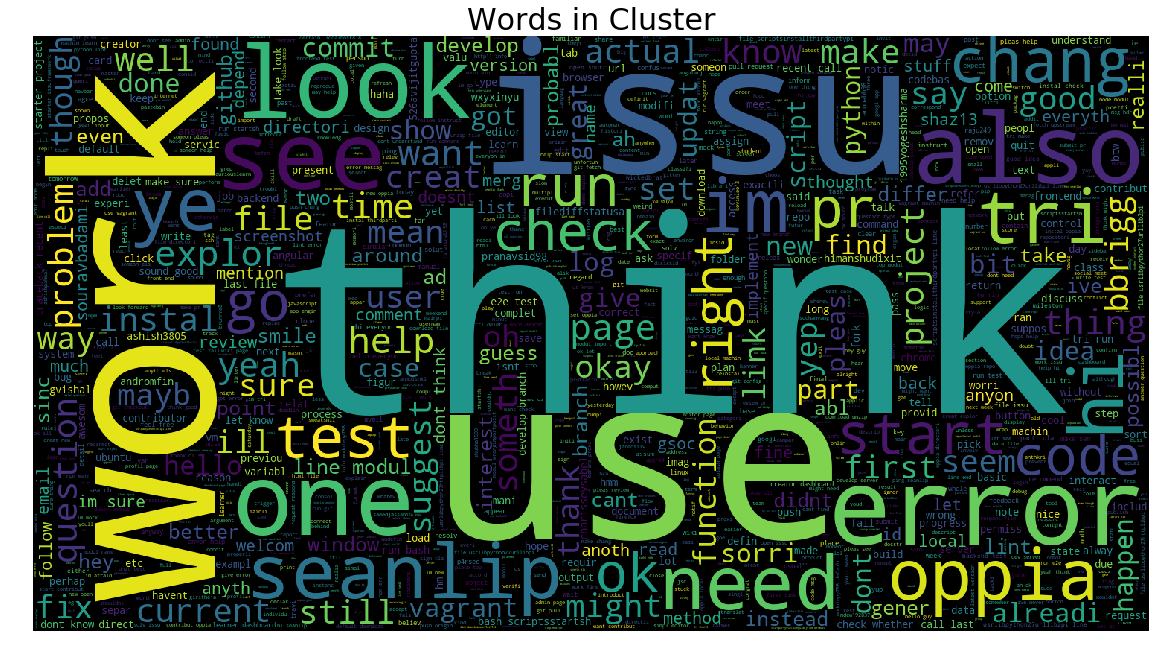

In [41]:
text=cluster[cluster['cluster'] == 0].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

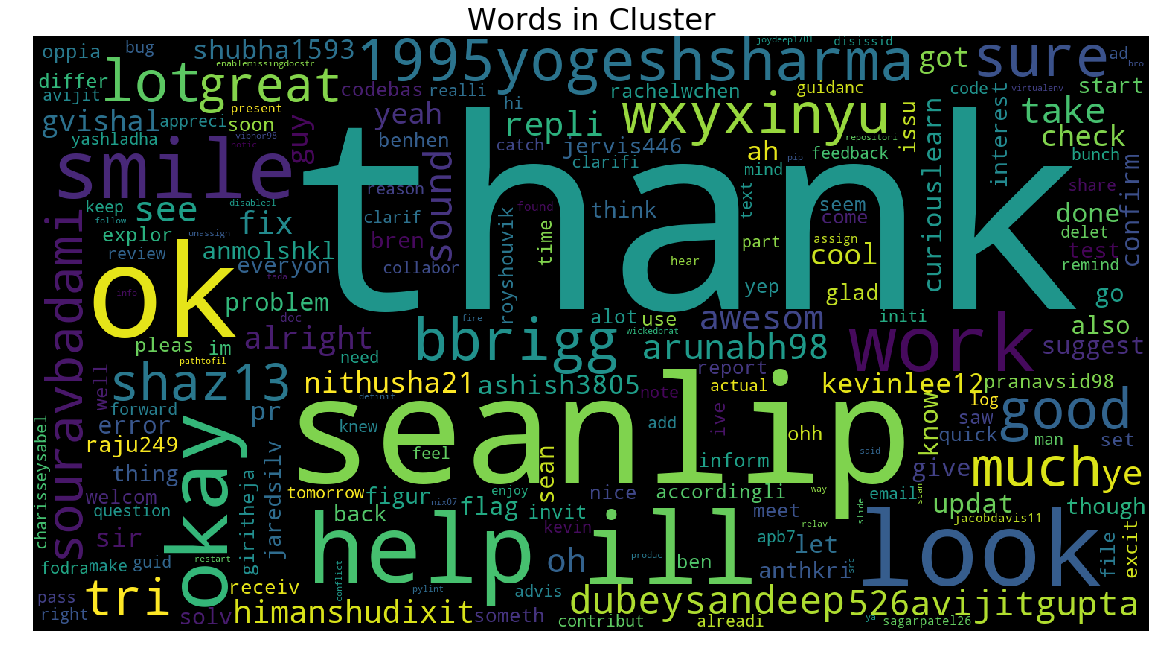

In [44]:
text=cluster[cluster['cluster'] == 1].text.values
wc= WordCloud(background_color="black", max_words=200, stopwords=stopword, height=800, width=1500,  collocations = False,)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

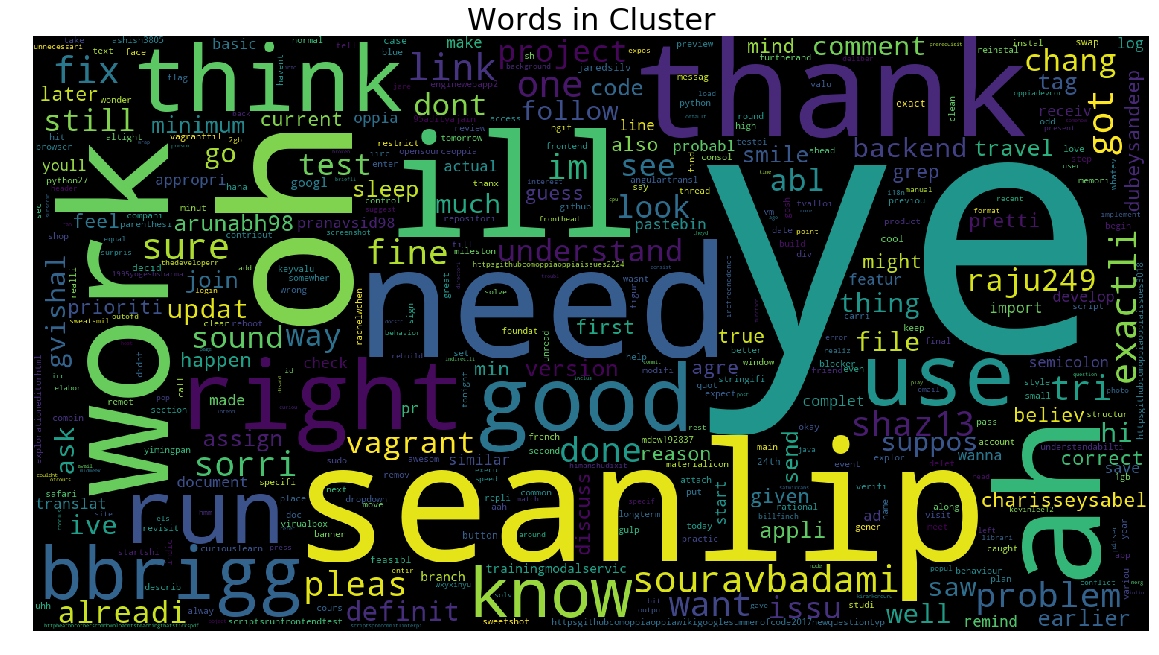

In [32]:
text=cluster[cluster['cluster'] == 2].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

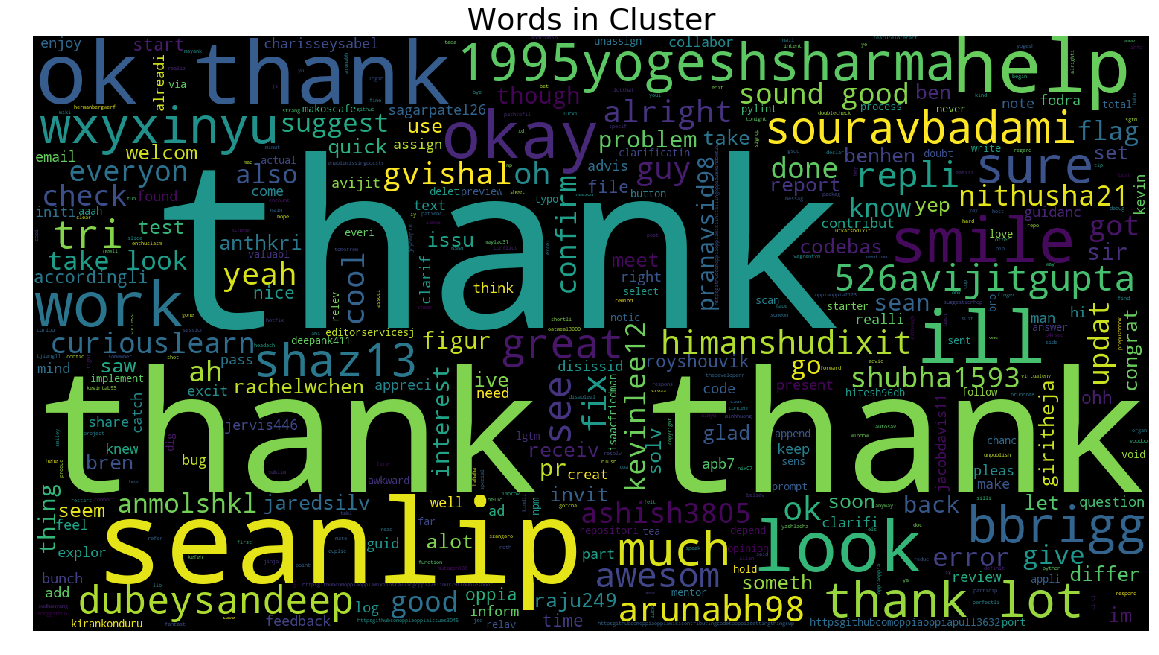

In [33]:
text=cluster[cluster['cluster'] == 3].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

In [34]:
chat_df.head()

,id,username,text,issue number,mentions,sent,editedAt,readBy,v,url,question_marks,Year,Month,Quarter,DOW,Day,Hour
0,5a698b69ce68c3bc74ff3b39,yashLadha,thank apb7,NaN,apb7,2018-01-25 07:46:49.126,NaT,39,1,NaN,0,2018,1,1,3,25,7
1,5a69f04a6117191e61afa2fa,bansalnitish,seanlip need help get review assign pull reque...,4607,seanlip,2018-01-25 14:57:14.418,2018-01-25 14:58:34.511,40,2,NaN,0,2018,1,1,3,25,14
2,5a6a6669ae53c15903361054,bansalnitish,pleas review httpsgithubcomoppiaoppiapull4608,4608,NaN,2018-01-25 23:21:13.980,NaT,41,1,NaN,0,2018,1,1,3,25,23
3,5a6b2b3298927d57453bfd06,joydeep1701,rais notimplementederror method overwritten de...,NaN,NaN,2018-01-26 13:20:50.168,2018-01-26 13:21:41.314,45,4,NaN,1,2018,1,1,4,26,13
4,5a6c01d5ce68c3bc740c8e69,seanlip,first indent continu line 4,NaN,NaN,2018-01-27 04:36:37.926,NaT,45,1,NaN,0,2018,1,1,5,27,4


In [35]:
MostActiveUsers = pd.DataFrame(chat_df.username.value_counts()[1:10]).reset_index()

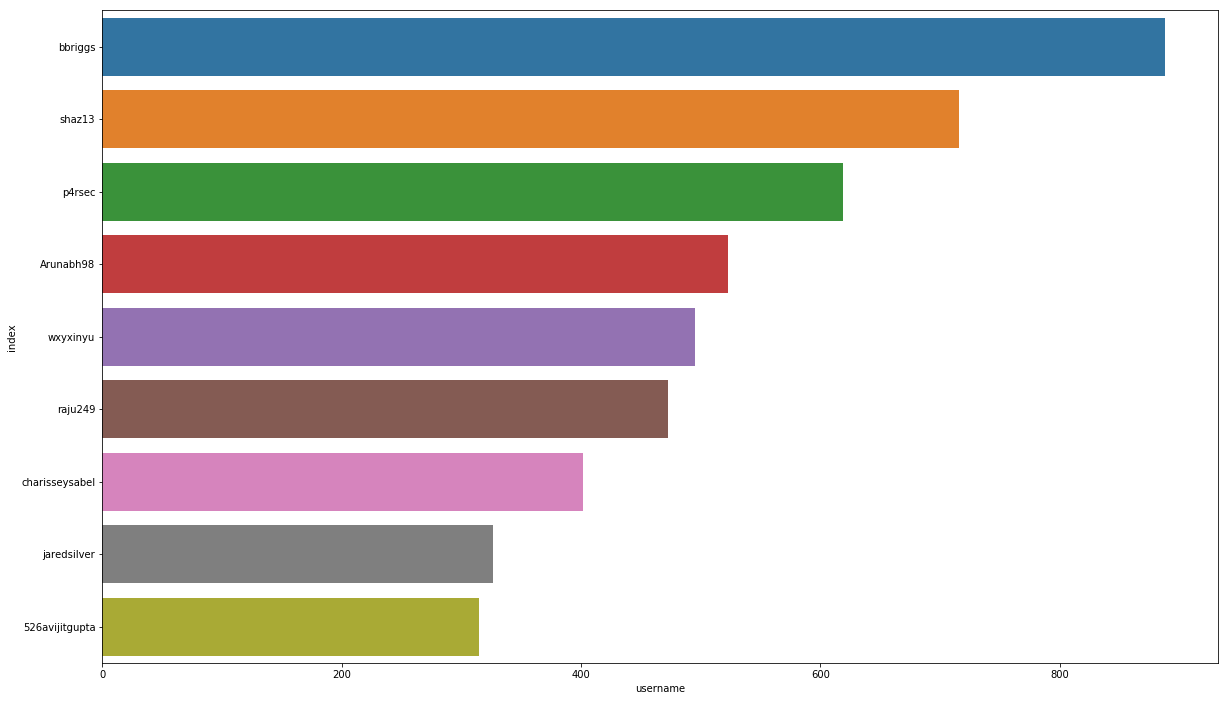

In [36]:
plt.figure(figsize=(20,12))
sns.barplot(y=MostActiveUsers['index'], x=MostActiveUsers.username )